<h1>K Means Clustering</h1>

In [17]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<b>Algorithm</b>
<ol>
    <li>Choose number of clusters to be used, $k.$</li>
    <li>Choose $k$ points at random to be inital cluster centers.</li>
    <li>Measure distance (by some metric, default=Euclidean) from each data point to a cluster center.</li>
    <li>Assign to each data point the cluster center closest to it.</li>
    <li>Calcualte the $k$ means of the data in each cluster to get new cluster locations.</li>
    <li>If step 5 yields new clusters, repeat from step 3. Otherwise, terminate.</li>
</ol>

<b>Limitations</b>
<ul>
    <li>Number of clusters is to be predetermined.</li>
    <li>Inital clustering is random.</li>
    <li>The algoritm is sensitive to outliers.</li>
    <li>Each data point is only assigned to one cluster.</li>
</ul>

In [32]:
dataset = pd.DataFrame({
    'x': [11,21,28,17,29,33,24,45,45,52,51,52,55,53,55,61,62,70,72,10],
    'y': [39,36,30,52,53,46,55,59,63,70,66,63,70,58,23,14,8,18,7,24]
})

In [33]:
test = KMeans(n_clusters=2)
test.fit(dataset)

KMeans(n_clusters=2)

In [34]:
centroids, labels = test.cluster_centers_, test.labels_

In [35]:
centroids, labels

(array([[35.06666667, 52.26666667],
        [64.        , 14.        ]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
       dtype=int32))

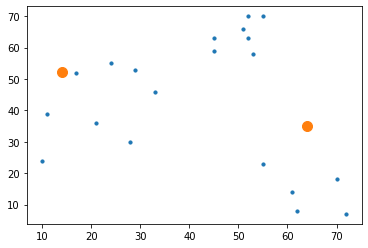

In [28]:
plt.scatter(dataset['x'], dataset['y'], s=10)
plt.scatter(centroids[0], centroids[1], s=100)

<h1>Hierarchical Clustering</h1>

This clustering method begins by assigning a cluster to every data point. In each iteration, the algorithm groups more clusters together based on an appropriate metric. This is repeated until a stop condition is met.

In [20]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward')
cluster.fit_predict(dataset)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])

In [31]:
help(cluster)

Help on AgglomerativeClustering in module sklearn.cluster._agglomerative object:

class AgglomerativeClustering(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  AgglomerativeClustering(n_clusters=2, *, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)
 |  
 |  Agglomerative Clustering
 |  
 |  Recursively merges the pair of clusters that minimally increases
 |  a given linkage distance.
 |  
 |  Read more in the :ref:`User Guide <hierarchical_clustering>`.
 |  
 |  Parameters
 |  ----------
 |  n_clusters : int or None, default=2
 |      The number of clusters to find. It must be ``None`` if
 |      ``distance_threshold`` is not ``None``.
 |  
 |  affinity : str or callable, default='euclidean'
 |      Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
 |      "manhattan", "cosine", or "precomputed".
 |      If linkage is "ward", only "euclidean" is accepted.
 |   